In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
print("Hello Shalu! This cell is working.")


Hello Shalu! This cell is working.


In [3]:
dataframe=pd.read_csv("kddcup.data_10_percent_corrected",header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
dataframe.shape

(494021, 42)

In [5]:
dataframe.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

In [60]:
dataframe.dtypes

0       int64
1      object
2      object
3      object
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31      int64
32      int64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41     object
dtype: object

In [6]:
dataframe.shape

(494021, 42)

In [7]:
dataframe.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41],
      dtype='int64')

In [8]:
dataframe.columns = [  # 42 features
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
    'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','label'
]


In [9]:
dataframe.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [11]:
dataframe.values

array([[0, 'tcp', 'http', ..., 0.0, 0.0, 'normal.'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal.'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal.'],
       ...,
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal.'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal.'],
       [0, 'tcp', 'http', ..., 0.0, 0.0, 'normal.']], dtype=object)

In [10]:
dataframe.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
dataframe.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [13]:
dataframe=dataframe.drop(columns=['num_outbound_cmds', 'is_host_login', 'land'])


In [14]:
type(dataframe)

pandas.core.frame.DataFrame

In [15]:
print(dataframe.shape) 

(494021, 39)


In [16]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.00,0.0,0.00,58329.0
src_bytes,494021.0,3025.610296,988218.101050,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494021.0,868.532425,33040.001252,0.0,0.00,0.0,0.00,5155468.0
wrong_fragment,494021.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494021.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494021.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.00,0.0,0.00,1.0
num_compromised,494021.0,0.010212,1.798326,0.0,0.00,0.0,0.00,884.0
root_shell,494021.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0


In [18]:
# Encode categorical features
for col in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    dataframe[col] = le.fit_transform(dataframe[col])

# Convert label into binary: 0 (normal), 1 (attack)
dataframe['target'] = dataframe['label'].apply(lambda x: 0 if x == 'normal.' else 1)
dataframe.drop(columns='label', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
X = dataframe.drop(columns='target')
X_scaled = scaler.fit_transform(X)
y = dataframe['target']

In [19]:
iso_model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_model.fit(X_scaled)
iso_preds = iso_model.predict(X_scaled)

# Map predictions: -1 (anomaly) → 1 (attack), 1 (normal) → 0
iso_preds = np.where(iso_preds == -1, 1, 0)

print("Isolation Forest Results:")
print(confusion_matrix(y, iso_preds))
print(classification_report(y, iso_preds))


Isolation Forest Results:
[[ 66022  31256]
 [352680  44063]]
              precision    recall  f1-score   support

           0       0.16      0.68      0.26     97278
           1       0.59      0.11      0.19    396743

    accuracy                           0.22    494021
   macro avg       0.37      0.39      0.22    494021
weighted avg       0.50      0.22      0.20    494021



In [20]:
input_dim = X_scaled.shape[1]

# Build model
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train only on normal data (unsupervised)
X_normal = X_scaled[y == 0]
autoencoder.fit(X_normal, X_normal, epochs=10, batch_size=256, shuffle=True,
                validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=2)])


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1028 - val_loss: 0.0103
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.9935e-04 - val_loss: 0.0012
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.5046e-04 - val_loss: 0.0011
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.8943e-04 - val_loss: 9.1752e-04
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2985e-04 - val_loss: 8.5563e-04
Epoch 9/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.0377e-04 - val_loss: 7.7186e-04
Epoch 10/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.8124e-04 - val_loss: 7.1565e-04


In [21]:
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Use a threshold (you can tune it)
threshold = np.percentile(mse, 95)
auto_preds = (mse > threshold).astype(int)

print("Autoencoder Results:")
print(confusion_matrix(y, auto_preds))
print(classification_report(y, auto_preds))


15439/15439 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step
Autoencoder Results:
[[ 97277      1]
 [372044  24699]]
              precision    recall  f1-score   support

           0       0.21      1.00      0.34     97278
           1       1.00      0.06      0.12    396743

    accuracy                           0.25    494021
   macro avg       0.60      0.53      0.23    494021
weighted avg       0.84      0.25      0.16    494021



In [23]:
from sklearn.model_selection import train_test_split

# Only use normal traffic for training
X_normal = X_scaled[y == 0]

X_train, X_test = train_test_split(X_normal, test_size=0.2, random_state=42)

autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))


Epoch 1/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 5.8749e-04 - val_loss: 4.1007e-04
Epoch 2/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 4.4206e-04 - val_loss: 3.7129e-04
Epoch 3/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 3.9428e-04 - val_loss: 3.1926e-04
Epoch 4/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 3.4346e-04 - val_loss: 2.6658e-04
Epoch 5/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.7169e-04 - val_loss: 2.3172e-04
Epoch 6/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.3598e-04 - val_loss: 2.5885e-04
Epoch 7/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.1416e-04 - val_loss: 2.0867e-04
Epoch 8/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.1223e-04 - val_loss: 2.0095e-04
Epoch 9/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.0516e-04 - val_loss: 1.8557e-04
Epoch 10/10
2432/2432 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.9187e-04 - val_loss: 1.9236e-04


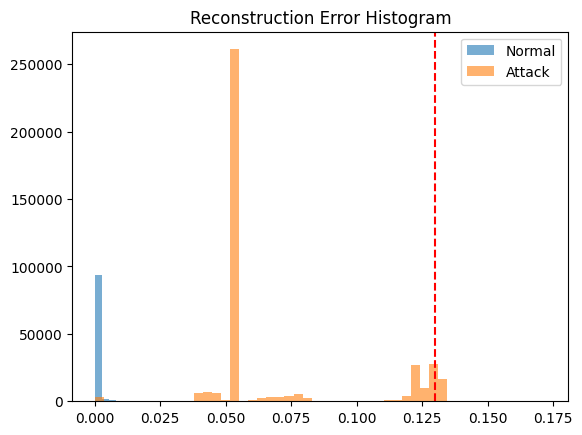

In [24]:
plt.hist(mse[y==0], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[y==1], bins=50, alpha=0.6, label='Attack')
plt.axvline(threshold, color='red', linestyle='--')
plt.legend()
plt.title("Reconstruction Error Histogram")
plt.show()
